Author: Kostya Malanchev, Neven Caplar and the LINCC Frameworks team

Last updated: November 13, 2025

# RAIL photo-z estimates for Rubin Data Preview 1 (DP1)


In this tutorial, you will learn:

- How to access photo-z catalog derived from Rubin’s Data Preview 1 with LSDB 

# Loading through LSDB

Photo-z Science Unit generated photo-z estimates for every galaxy in DP1 using the available multi-band imaging on a best-effort basis. This effort is described at https://sitcomtn-154.lsst.io. 

In [1]:
import lsdb
import matplotlib.pyplot as plt

PATH_PHOTOZ = "/rubin/lsdb_data/object_photoz/"
dp1_pz_catalog = lsdb.open_catalog(PATH_PHOTOZ)
dp1_pz_catalog

,coord_dec,coord_ra,g_cModelMag,g_cModelMagErr,g_gaap1p0Mag,g_gaap1p0MagErr,g_gaap3p0Mag,g_gaap3p0MagErr,g_kronMag,g_kronMagErr,g_psfMag,g_psfMagErr,g_sersicMag,g_sersicMagErr,i_cModelMag,i_cModelMagErr,i_gaap1p0Mag,i_gaap1p0MagErr,i_gaap3p0Mag,i_gaap3p0MagErr,i_kronMag,i_kronMagErr,i_psfMag,i_psfMagErr,i_sersicMag,i_sersicMagErr,objectId,r_cModelMag,r_cModelMagErr,r_gaap1p0Mag,r_gaap1p0MagErr,r_gaap3p0Mag,r_gaap3p0MagErr,r_kronMag,r_kronMagErr,r_psfMag,r_psfMagErr,r_sersicMag,r_sersicMagErr,u_cModelMag,u_cModelMagErr,u_gaap1p0Mag,u_gaap1p0MagErr,u_gaap3p0Mag,u_gaap3p0MagErr,u_kronMag,u_kronMagErr,u_psfMag,u_psfMagErr,u_sersicMag,u_sersicMagErr,y_cModelMag,y_cModelMagErr,y_gaap1p0Mag,y_gaap1p0MagErr,y_gaap3p0Mag,y_gaap3p0MagErr,y_kronMag,y_kronMagErr,y_psfMag,y_psfMagErr,y_sersicMag,y_sersicMagErr,z_cModelMag,z_cModelMagErr,z_gaap1p0Mag,z_gaap1p0MagErr,z_gaap3p0Mag,z_gaap3p0MagErr,z_kronMag,z_kronMagErr,z_psfMag,z_psfMagErr,z_sersicMag,z_sersicMagErr,lephare_z_median,lephare_z_mean,lephare_z_mode,lephare_z_err95_low,lephare_z_err95_high,lephare_z_err68_low,lephare_z_err68_high,knn_z_median,knn_z_mode,knn_z_err95_low,knn_z_err95_high,knn_z_err68_low,knn_z_err68_high,tpz_z_median,tpz_z_mean,tpz_z_mode,tpz_z_err95_low,tpz_z_err95_high,tpz_z_err68_low,tpz_z_err68_high,cmnn_z_median,cmnn_z_mean,cmnn_z_mode,cmnn_z_err95_low,cmnn_z_err95_high,cmnn_z_err68_low,cmnn_z_err68_high,gpz_z_median,gpz_z_mean,gpz_z_mode,gpz_z_err95_low,gpz_z_err95_high,gpz_z_err68_low,gpz_z_err68_high,bpz_z_median,bpz_z_mean,bpz_z_mode,bpz_z_err95_low,bpz_z_err95_high,bpz_z_err68_low,bpz_z_err68_high,dnf_z_median,dnf_z_mean,dnf_z_mode,dnf_z_err95_low,dnf_z_err95_high,dnf_z_err68_low,dnf_z_err68_high,fzboost_z_median,fzboost_z_mean,fzboost_z_mode,fzboost_z_err95_low,fzboost_z_err95_high,fzboost_z_err68_low,fzboost_z_err68_high
npartitions=4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 3, Pixel: 2",double[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],int64[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow]

In [2]:
# Extract method names based on column suffix to learn what photo-z methods are available
z_median_methods = sorted(
    col.replace("_z_median", "")
    for col in dp1_pz_catalog.all_columns
    if col.endswith("_z_median")
)

print(z_median_methods)

['bpz', 'cmnn', 'dnf', 'fzboost', 'gpz', 'knn', 'lephare', 'tpz']


## Plotting two estimators

Plotting, as an example, the results from Lephare and kNN.

In [3]:
dp1_pz_df = lsdb.open_catalog(PATH_PHOTOZ, columns = ["lephare_z_median", "knn_z_median"]).compute()

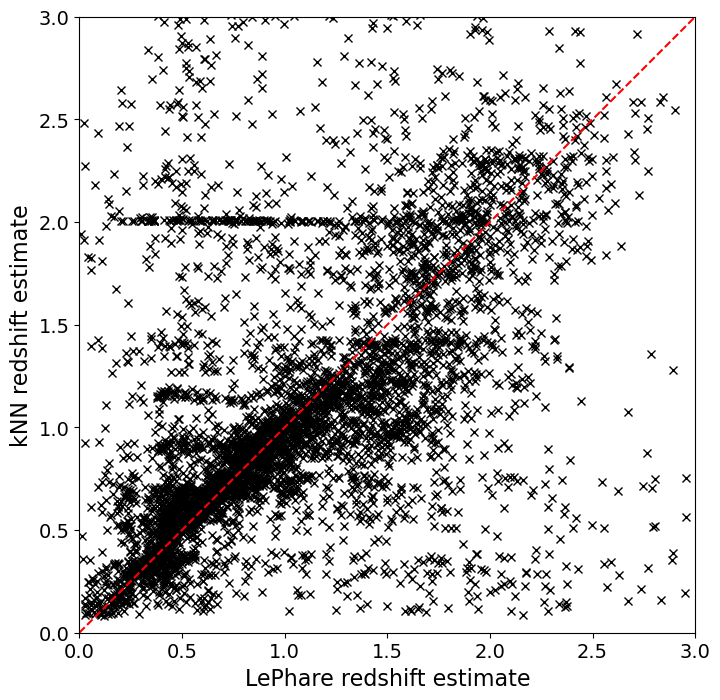

In [4]:
plt.figure(figsize=(8, 8))

# Plot sampled points
plt.plot(dp1_pz_df["lephare_z_median"].iloc[::100], dp1_pz_df["knn_z_median"].iloc[::100], "x", color="black")

# Set equal aspect ratio
plt.gca().set_aspect("equal", adjustable="box")

# Plot reference y=x line
plt.plot([0, 3], [0, 3], color="red", ls="--")

# Set axis limits
plt.xlim([0, 3])
plt.ylim([0, 3])

# Set axis labels with larger font size and descriptions
plt.xlabel("LePhare redshift estimate", fontsize=16)
plt.ylabel("kNN redshift estimate", fontsize=16)

# Make tick labels larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


# Problem 2

## Compare with spectroscopic DESI redshifts

Let's compare photometric redshifts with spectroscopic ones. Crossmatch with DESI spectroscopical redshift catalog that covers the southern sky (available at https://data.lsdb.io/#DESI/DESI_DR1_(z-catalog)) and plot the results of any photo-z method compared with spectroscopical redshifts.

In [5]:
# lets save this catalog so that we can use it for solving this problem

In [6]:
dp1_pz_catalog.to_hats('dp1_pz_catalog')